# Análisis de los resultados del modelado

Como se tienen dos modelos distintos. Uno para grado y otro para máster. Quiero que se compruebe lo mismo para cada uno de los conjunto de datos:

1. Comprobar el porcentaje de acierto (accuracy) global y el AUC
2. Comprobar la tasa de matriculación y la media de la probabilidad de matrícula. Tanto en general, como por top 5 de titulaciones. ESTO ES MUY INTERESANTE porque se vería genial cómo funciona le modelo.
3. Comprobar el pocentaje de acierto y el AUC por Etapa y Subetapa (concatenadas). ¿Va aumentando conforme las etapas se van acercando a la matriculación?
4. Comprobar el pocentaje de acierto por el top 5 de titulaciones con más oportunidades ¿Acierta muchos en las titulaciones como Medicina, Enfermería, etc?
5. Comprobar las titulaciones con menos porcentaje de acierto. ¿En las que falla, es porque hay pocas oportunidades?

Nota: Aquí puedes utilizar gráficos boxplot y, gráficos boxplot con densidades para algún caso de alguna titulación que quieras mirar en concreto. O para mirar cómo se distribuyen las probabilidades.

Si tienes alguna duda en conceptos de Accuracy o AUC puedes comprobar en el código de Miguel cómo se construye. Pero básicamente:

AUC: Área bajo la curva ROC. Es un indicador de lo bien o mal que separa el modelo entre Matriculados y no matriculados. Cuanto más cercano a 1, mejor separa y mejor es el modelo. A Miguel le sale un AUC de 0.88 - 0.9.

Accuracy: Porcentaje de acierto. No tiene más misterio.

# GRADO

### Carga de los datos

In [2]:
import pandas as pd

# Cargar el Excel (única hoja)
df_grado = pd.read_excel(r"C:\Users\0021878\Downloads\test_grado_completo_con_scoring.xlsx")

# Vista rápida de las primeras filas
df_grado

,target,desmatriculado,PL_CURSO_ACADEMICO,CH_NACIONAL,NU_NOTA_MEDIA_ADMISION,NU_NOTA_MEDIA_1_BACH__PC,CH_PRUEBAS_CALIFICADAS,NU_RESULTADO_ADMISION_PUNTOS,PL_RESOLUCION_DEFINITIVA,TITULACION,...,tiempo_etapa_dias,tiempo_entre_etapas_dias,num_asistencias_acum,num_solicitudes_acum,PCA1,PCA2,cluster,interpretacion_cluster,probabilidad_matricula,prediction_label
0,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,1097,1097,0,0,-9.925818,34.478101,0,Perfil mixto / no dominante,0.0000,0
1,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,93,93,0,0,-2.923296,2.295669,0,Perfil mixto / no dominante,0.0000,0
2,0,0,2025/2026,False,0.0,0.0,False,0.0,0,Doble Grado Relaciones Internacionales/ Derecho,...,0,0,0,0,-2.274656,-0.685373,0,Perfil mixto / no dominante,0.0014,0
3,0,0,2025/2026,True,0.0,0.0,False,0.0,Admitido,Máster en Big Data Science,...,91,91,0,0,-2.323181,1.899729,0,Perfil mixto / no dominante,0.0000,0
4,0,0,2025/2026,True,0.0,0.0,False,0.0,Admitido,Máster en Big Data Science,...,986,986,0,0,-8.565469,30.588251,0,Perfil mixto / no dominante,0.0700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105960,0,0,2025/2026,True,0.0,7.0,False,0.0,Admitido,Grado en Ingeniería en Organización Industrial...,...,0,0,0,0,-0.832123,-0.771191,0,Perfil mixto / no dominante,0.0000,0
105961,0,0,2025/2026,True,0.0,7.0,False,0.0,Admitido,Grado en Ingeniería en Organización Industrial...,...,0,0,0,0,-0.832123,-0.771191,0,Perfil mixto / no dominante,0.0000,0
105962,1,0,2025/2026,True,0.0,10.0,False,0.0,Admitido,Alumno extraordinario (Facultad de CC.Económic...,...,0,0,0,0,-0.450835,-0.673128,0,Perfil mixto / no dominante,0.0984,0
105963,1,0,2025/2026,True,0.0,10.0,False,0.0,Admitido,Alumno extraordinario (Facultad de CC.Económic...,...,0,0,0,0,-0.450835,-0.673128,0,Perfil mixto / no dominante,0.0984,0


### Vistazo rápido a las columnas

In [17]:
df_grado.columns

Index(['target', 'desmatriculado', 'PL_CURSO_ACADEMICO', 'CH_NACIONAL',
       'NU_NOTA_MEDIA_ADMISION', 'NU_NOTA_MEDIA_1_BACH__PC',
       'CH_PRUEBAS_CALIFICADAS', 'NU_RESULTADO_ADMISION_PUNTOS',
       'PL_RESOLUCION_DEFINITIVA', 'TITULACION', 'CENTROENSENANZA',
       'MINIMUMPAYMENTPAYED', 'PAID_AMOUNT', 'PAID_PERCENT',
       'CH_PAGO_SUPERIOR', 'CH_MATRICULA_SUJETA_BECA', 'CH_AYUDA_FINANCIACION',
       'CU_IMPORTE_TOTAL', 'CH_VISITACAMPUS__PC', 'CH_ENTREVISTA_PERSONAL__PC',
       'ACC_DTT_FECHAULTIMAACTIVIDAD', 'NU_PREFERENCIA', 'STAGENAME',
       'PL_SUBETAPA', 'CH_HIJO_EMPLEADO__PC', 'CH_HIJO_PROFESOR_ASOCIADO__PC',
       'CH_HERMANOS_ESTUDIANDO_UNAV__P', 'CH_HIJO_MEDICO__PC',
       'YEARPERSONBIRTHDATE', 'NAMEX', 'CH_FAMILIA_NUMEROSA__PC',
       'PL_SITUACION_SOCIO_ECONOMICA', 'LEADSOURCE', 'PL_ORIGEN_DE_SOLICITUD',
       'PL_PLAZO_ADMISION', 'RECORDTYPENAME', 'PLAZO_ADMISION_LIMPIO',
       'FO_rentaFam_ges__c', 'CU_precioOrdinario_def__c',
       'CU_precioAplicado_d

In [4]:
print(f"Filas: {df_grado.shape[0]}, Columnas: {df_grado.shape[1]}")
print(df_grado.isnull().sum())


Filas: 105965, Columnas: 51
target                            0
desmatriculado                    0
PL_CURSO_ACADEMICO                0
CH_NACIONAL                       0
NU_NOTA_MEDIA_ADMISION            0
NU_NOTA_MEDIA_1_BACH__PC          0
CH_PRUEBAS_CALIFICADAS            0
NU_RESULTADO_ADMISION_PUNTOS      0
PL_RESOLUCION_DEFINITIVA          0
TITULACION                        0
CENTROENSENANZA                   0
MINIMUMPAYMENTPAYED               0
PAID_AMOUNT                       0
PAID_PERCENT                      0
CH_PAGO_SUPERIOR                  0
CH_MATRICULA_SUJETA_BECA          0
CH_AYUDA_FINANCIACION             0
CU_IMPORTE_TOTAL                  0
CH_VISITACAMPUS__PC               0
CH_ENTREVISTA_PERSONAL__PC        0
ACC_DTT_FECHAULTIMAACTIVIDAD      0
NU_PREFERENCIA                    0
STAGENAME                         0
PL_SUBETAPA                       0
CH_HIJO_EMPLEADO__PC              0
CH_HIJO_PROFESOR_ASOCIADO__PC     0
CH_HERMANOS_ESTUDIANDO_UNAV__P    0


### 1. Comprobar el porcentaje de acierto (accuracy) global y el AUC

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Accuracy
accuracy = accuracy_score(df_grado['target'], df_grado['prediction_label'])

# AUC
auc = roc_auc_score(df_grado['target'], df_grado['probabilidad_matricula'])

print(f"Accuracy global (Grado): {accuracy:.4f}")
print(f"AUC global (Grado): {auc:.4f}")


Accuracy global (Grado): 0.9156
AUC global (Grado): 0.7597


### 2. Comprobar la tasa de matriculación y la media de la probabilidad de matrícula.

##### General

In [13]:
# --- Tasa de matriculación y media de probabilidad (general) ---
tasa_matriculacion_general = df_grado['target'].mean()
media_probabilidad_general = df_grado['probabilidad_matricula'].mean()

print(f"Tasa de matriculación (general): {tasa_matriculacion_general:.4f}")
print(f"Media de probabilidad (general): {media_probabilidad_general:.4f}")


Tasa de matriculación (general): 0.4635
Media de probabilidad (general): 0.0850


##### Top 5 de titulaciones

In [14]:
# --- Top 5 titulaciones con más registros ---
top5_titulaciones = df_grado['TITULACION'].value_counts().head(5).index
df_top5 = df_grado[df_grado['TITULACION'].isin(top5_titulaciones)]

# Métricas por titulación
resultados_top5 = df_top5.groupby('TITULACION').agg(
    tasa_matriculacion=('target', 'mean'),
    media_probabilidad=('probabilidad_matricula', 'mean'),
    registros=('TITULACION', 'count')
).reset_index()

# Mostrar como tabla
resultados_top5


,TITULACION,tasa_matriculacion,media_probabilidad,registros
0,Grado en Enfermería,0.458226,0.085406,3112
1,Grado en Estudios de Arquitectura,0.470941,0.094837,3338
2,Grado en Medicina,0.206054,0.072057,7896
3,Grado en Medicina + International Program,0.248386,0.065930,4956
4,Grado en Psicología,0.434529,0.071364,3765


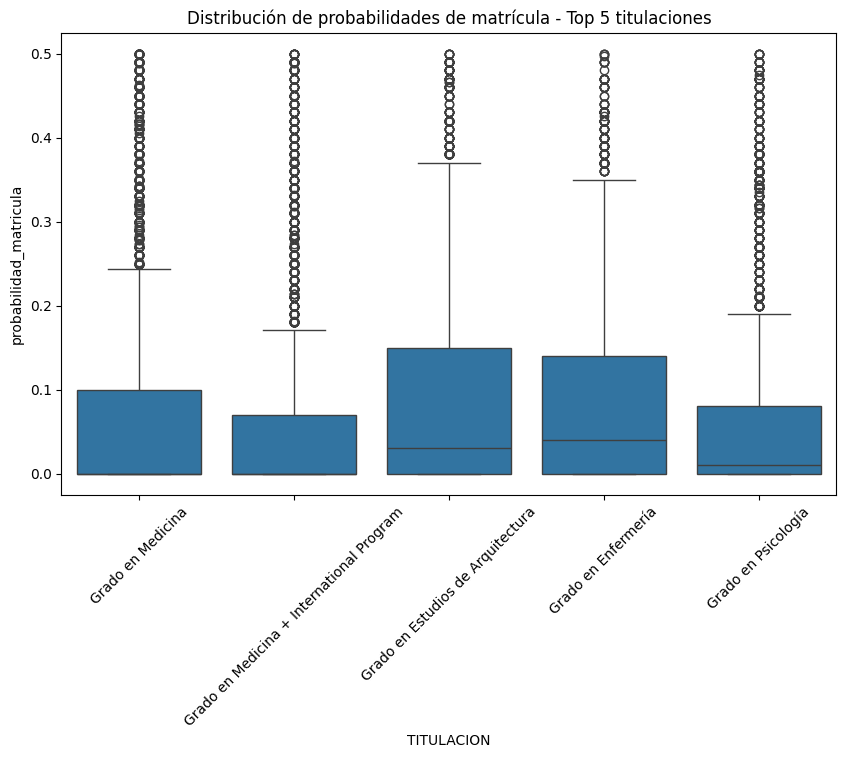

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo el top 5
df_top5 = df_grado[df_grado['TITULACION'].isin(top5_titulaciones)]

plt.figure(figsize=(10,6))
sns.boxplot(x='TITULACION', y='probabilidad_matricula', data=df_top5)
plt.title('Distribución de probabilidades de matrícula - Top 5 titulaciones')
plt.xticks(rotation=45)
plt.show()


Para la interpretación del gráfico:
- Eje Y: Probabilidad de matrícula asignada por el modelo.
- Eje X: Las 5 titulaciones con más registros.
- Las cajas muestran el rango intercuartílico (Q1–Q3) y la línea central es la mediana.
- Los puntos fuera de las “bigotes” son valores atípicos (outliers).

Observaciones:
1. Medicina y el International Program tienen medianas de probabilidad más bajas → el modelo es más conservador en estas titulaciones.

2. Arquitectura y Enfermería tienen medianas más altas → el modelo asigna más probabilidad de matrícula en general.

3. Hay bastante dispersión en todas las titulaciones, lo que indica que el modelo no siempre está “seguro” y varía mucho según el caso.

### 3. Comprobar el pocentaje de acierto y el AUC por Etapa y Subetapa (concatenadas). ¿Va aumentando conforme las etapas se van acercando a la matriculación?

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

def calcular_auc_safe(y_true, y_prob):
    if len(set(y_true)) < 2:
        return None
    return roc_auc_score(y_true, y_prob)

# Filtrar subetapas no nulas
df_filtrado = df_grado[df_grado['PL_SUBETAPA'].notna()]

# Calcular métricas por subetapa
resultados_subetapas = df_filtrado.groupby('PL_SUBETAPA').apply(
    lambda x: pd.Series({
        'accuracy': accuracy_score(x['target'], x['prediction_label']),
        'auc': calcular_auc_safe(x['target'], x['probabilidad_matricula']),
        'registros': len(x)
    })
).reset_index()

# Reemplazar None por texto
resultados_subetapas['auc'] = resultados_subetapas['auc'].apply(lambda x: "No calculable" if pd.isna(x) else round(x, 4))

# Convertir todo a string para evitar el TypeError
resultados_subetapas['PL_SUBETAPA'] = resultados_subetapas['PL_SUBETAPA'].astype(str)

# Ordenar alfabéticamente
resultados_subetapas = resultados_subetapas.sort_values('PL_SUBETAPA')

# Mostrar tabla limpia
resultados_subetapas


C:\Users\0021878\AppData\Local\Temp\ipykernel_38868\683351325.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultados_subetapas = df_filtrado.groupby('PL_SUBETAPA').apply(


,PL_SUBETAPA,accuracy,auc,registros
0,0,0.991152,No calculable,15596.0
1,Completa,1.000000,No calculable,4.0
2,Convocado,1.000000,No calculable,16.0
3,Desmatriculado,0.215938,No calculable,3890.0
4,Enviada,0.333333,No calculable,15.0
5,Formalizada,0.924875,0.4166,49118.0
6,Incompleta,0.997059,No calculable,340.0
7,Inicio,0.809609,No calculable,2248.0
8,Matriculado parcialmente,0.431567,No calculable,1812.0
9,No formalizada,0.652174,No calculable,92.0
